In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import statistics
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [41]:
new_data = pd.read_csv("leukemia.csv")
print(new_data.shape)

(74, 5148)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 1. F3( N features ) → F1( 2N/3 features out of selected features from F3) →    
##           F2(N/3 features out of selected features from F1)

# Preprocessing

In [42]:
df = new_data.iloc[2:,:] # Removes first two tubles
print(df["gene"].unique())
df.gene[df.gene == 'ALL'] = 0
df.gene[df.gene == 'AML'] = 1
print('Updated value of gene : '+str(df["gene"].unique()))


['ALL' 'AML']
Updated value of gene : [0 1]


In [43]:
print('Required data set ')
df.head()

Required data set 


,gene,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,0,88,15091,311,21,-13,215,797,14538,9738,...,384,1582,185,511,389,793,329,36,191,-37
3,0,283,11038,134,-21,-219,116,433,615,115,...,231,624,169,837,442,782,295,11,76,-14
4,0,309,16692,378,67,104,476,1474,5669,3272,...,720,753,315,1199,168,1138,777,41,228,-41
5,0,12,15763,268,43,-148,155,415,4850,2293,...,307,743,240,835,174,627,170,-50,126,-91
6,0,168,18128,118,-8,-55,122,483,1284,2731,...,178,626,156,649,504,250,314,14,56,-25


In [44]:
df.isnull().sum()

gene              0
AFFX-BioC-5_at    0
hum_alu_at        0
AFFX-DapX-M_at    0
AFFX-LysX-5_at    0
                 ..
X83863_at         0
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
Length: 5148, dtype: int64

In [45]:
feature_set = df.drop('gene', 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['AFFX-BioC-5_at', 'hum_alu_at', 'AFFX-DapX-M_at', 'AFFX-LysX-5_at', 'AFFX-HUMISGF3A/M97935_MA_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMRGE/M10098_5_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-HUMRGE/M10098_3_at', 'AFFX-HUMGAPDH/M33197_5_at', 'AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HUMGAPDH/M33197_3_at', 'AFFX-HSAC07/X00351_5_at', 'AFFX-HSAC07/X00351_M_at', 'AFFX-HSAC07/X00351_3_at', 'AFFX-HUMTFRR/M11507_5_at', 'AFFX-HUMTFRR/M11507_M_at', 'AFFX-HUMTFRR/M11507_3_at', 'AFFX-M27830_5_at', 'AFFX-M27830_M_at', 'AFFX-HSAC07/X00351_3_st', 'AFFX-HUMGAPDH/M33197_M_st', 'AFFX-HUMGAPDH/M33197_3_st', 'AFFX-HSAC07/X00351_M_st', 'A28102_at', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002365_at', 'AB002380_at', 'AB002559_at', 'AB003102_at', 'AB003103_

In [46]:
feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,88,15091,311,21,-13,215,797,14538,9738,8529,...,384,1582,185,511,389,793,329,36,191,-37
3,283,11038,134,-21,-219,116,433,615,115,1518,...,231,624,169,837,442,782,295,11,76,-14
4,309,16692,378,67,104,476,1474,5669,3272,3668,...,720,753,315,1199,168,1138,777,41,228,-41
5,12,15763,268,43,-148,155,415,4850,2293,2569,...,307,743,240,835,174,627,170,-50,126,-91
6,168,18128,118,-8,-55,122,483,1284,2731,316,...,178,626,156,649,504,250,314,14,56,-25


In [47]:
target_feature = df['gene']
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: gene, dtype: object

In [48]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


# Training and Spilting of Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((57, 5147), (15, 5147))

In [50]:
y_train.shape, y_test.shape

((57,), (15,))

In [51]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns
print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 3431.3333333333335
number_of_features_required_2 : 1715.6666666666667
number_of_features_required_3 : 977.9300000000001
number_of_features_required_1 in integers: 3431
number_of_features_required_2 in integers: 1715
number_of_features_required_3 in integers: 977


# Feature Selection Using T-Test

In [52]:
start_time_t = time.time()
x= df.values               #converting data-frame into numpy arrray

a,b = x.shape             #size(row,column) of 2-d array stored in two variables

n1 =0;
n2 = 0;

for i in range(a):        #calculating size of each class lable
    if x[i][0] == 1:
        n1=n1 + 1;
    else:
        n2=n2 + 1;


sample1 = []
sample2= []
tval=[]

#below is main loop for calculating t-value of each column

for j in range(1,b):      #for each column(feature)
    for i in range(a):

        if x[i][0]== 1:           #dividing feature values into two samples corresponding to class levels  1 and 2.
            sample1.append(x[i][j])
        else:
            sample2.append(x[i][j])



    sample1 = list(map(int,sample1))       #converting sample values from string to integar
    sample2 = list(map(int,sample2))


    s1bar = statistics.mean(sample1)          #calculating mean of each sample
    s2bar = statistics.mean(sample2)

    s1var = statistics.variance(sample1)      #calculating variance of each sample
    s2var = statistics.variance(sample2)



    t = abs(s1bar - s2bar)/np.sqrt(s1var/n1+s2var/n2)        #calculating t value by comparing mean and variance using given formula

    tval.append(t)       #appending t-value of each sample to a list

    sample1.clear()      #clearing sample list  as it will be reused for each column(feature)
    sample2.clear()



sort_index=[]

sort_index = sorted(range(len(tval)), key=lambda k: tval[k])   #sorting t-value in ascending order and storing corresponding index


new_index = [p+1 for p in sort_index]    #increasing sorted index by 1 since  we have to fetch it from dataframe for corresponding columns

new_index.reverse()     # it will sort the index in descending order

# Note: columns having more t- values are more important hence we will select less than 20% of features from starting of the calculated new_index list

required_features_t = new_index[:number_of_features_required_1]   #selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :6.083202362060547 seconds


In [53]:
print(required_features_t)

[3151, 1727, 4969, 1934, 3545, 4531, 1228, 4570, 3054, 850, 1711, 1790, 601, 5139, 3629, 2377, 5043, 4212, 636, 4863, 4026, 1413, 1437, 1489, 3234, 796, 4407, 1549, 1336, 3776, 3933, 4091, 3030, 1194, 4572, 3617, 4062, 1270, 1331, 3066, 1674, 3431, 3177, 1224, 1396, 88, 2722, 346, 1375, 1830, 1556, 3371, 4381, 4550, 909, 1721, 524, 2424, 953, 412, 3266, 2904, 926, 3311, 1789, 3834, 3252, 4711, 3144, 4928, 4623, 1170, 4710, 5008, 3123, 307, 1564, 1666, 1919, 2563, 406, 4487, 1999, 3076, 1735, 4111, 3350, 1530, 3241, 3851, 4159, 2805, 3694, 371, 798, 2764, 3259, 3195, 4738, 2860, 2695, 1394, 2994, 2319, 2540, 944, 674, 2005, 3022, 3607, 4086, 4420, 997, 1480, 2919, 495, 4643, 3148, 159, 4500, 3793, 2085, 153, 3873, 3592, 1183, 3599, 889, 1770, 4902, 1779, 2497, 4931, 4412, 3187, 2354, 1008, 1814, 4364, 835, 4992, 4780, 1242, 2897, 4925, 2477, 2295, 3028, 4929, 1135, 3745, 1293, 1025, 3242, 2709, 2239, 3401, 1174, 1313, 4739, 3727, 31, 3153, 4514, 2435, 4880, 2769, 2329, 1387, 2124, 1864,

In [54]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  3431


In [55]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['X59417_at', 'M92287_at', 'M31523_at', 'U05259_rna1_at', 'X95735_at', 'M84371_rna1_s_at', 'M11722_at', 'M31211_s_at', 'X17042_at', 'J05243_at', 'M89957_at', 'S50223_at', 'D88270_at', 'U29175_at', 'Y08612_at', 'U46499_at', 'M28170_at', 'U22376_cds2_s_at', 'HG1612-HT1612_at', 'X97267_rna1_s_at', 'Z15115_at', 'M31303_rna1_at', 'M33680_at', 'M55150_at', 'X66401_cds1_at', 'J03473_at', 'L09209_s_at', 'M62762_at', 'M23197_at', 'Z49194_at', 'U07139_at', 'D26156_s_at', 'X15414_at', 'L47738_at', 'M65214_s_at', 'Y07604_at', 'L06797_s_at', 'M16038_at', 'M22960_at', 'X51521_at', 'M84526_at', 'X82240_rna1_at', 'X61587_at', 'M11147_at', 'M29696_at', 'AF009426_at', 'U77948_at', 'D49950_at', 'M27891_at', 'S76617_at', 'M63138_at', 'X78669_at', 'M32304_s_at', 'M27504_s_at', 'L07633_at', 'M91432_at', 'D86967_at', 'U50136_rna1_at', 'L13278_at', 'D63880_at', 'X69111_at', 'U94855_at', 'L09717_at', 'X74262_at', 'S46622_at', 'D38073_at', 'X67951_at', 'U18271_cds3_s_at', 'X58529_at', 'L4

In [56]:
X_train1 = X_train.iloc[:,required_features_t]
X_train1.head()

,X59434_at,M92303_at,M31932_at,U05291_at,X96381_rna1_at,M21142_cds2_s_at,M11726_at,M31241_s_at,X17094_at,J05249_at,...,L05624_s_at,L78833_cds1_at,Z48501_s_at,M63582_at,X66141_at,U35048_at,U82275_at,U31903_s_at,J02888_at,U62961_at
55,0.408145,-0.580525,-1.058378,-0.478810,0.697176,-1.837563,-0.736494,0.009076,-0.673224,-0.840302,...,0.975946,-0.151753,-0.844328,-0.409404,-0.354113,-0.488018,-0.180350,-0.080258,-0.344649,-1.171468
70,0.208701,2.812671,-0.976641,2.893675,-1.289414,-1.161750,1.140880,1.361020,-0.532947,1.265147,...,-3.813462,1.381749,-0.498627,-0.481827,3.576312,-0.079846,-0.723858,3.566681,2.930669,-0.606401
62,0.429139,-0.902329,-0.393721,-1.302209,0.966327,-0.859030,0.310883,3.591730,-0.236452,0.302602,...,0.994496,-0.381778,-0.699685,1.057866,0.416828,-0.608745,0.759202,-0.618721,0.191985,-1.723977
43,2.675505,1.513235,0.774268,4.402418,-0.270486,-0.849721,-0.097528,0.347062,-1.298095,1.549923,...,0.990786,0.908920,-1.014320,0.225473,-0.966736,-0.861696,-0.511089,3.499968,0.901329,-0.380374
4,-0.793765,-1.036753,-0.423835,-0.232283,-1.238148,-0.131460,-0.855065,-1.117545,-0.379917,0.165909,...,1.090952,1.177282,0.199236,-0.291834,0.072658,0.878783,-0.230909,-1.635289,-0.289135,0.310264


# Selection of features using Mutual Information 

In [57]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
  #Combining the data values
  combo_d= np.vstack((x,y)).T
  #Number of data points
  n=len(x)
  n_x=[]
  unique_y=len(set(y))
  #Defining Empty list for every class
  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=item[1]
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[pt[1]]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
    #Considering k=3 for the kth nearest neighbour of point in the class the point belongs to
    k=3
    kth_dist_c=distx[k-1]
    dist=[]
    #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))
    #Calculating the number of points in the dataset at distance = kth distance_class from the point
    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
    #Total points in class the point belongs to
    n_x_i=len(n_x[pt[1]])
    #Calculating I_i for every point
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx=indx + 1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)

In [58]:
X_train_tp=X_train1.values.transpose()
mi_start_time = time.time()
#Total feature in training set 
total_features=len(required_features_t)
#Defining array to list of mutual information of every pair of feature and target feature
mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Gene and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Gene and Feature_AFFX-BioC-5_at :  0.17758207829536746
Mutual Information between Gene and Feature_hum_alu_at :  0.045614242927269594
Mutual Information between Gene and Feature_AFFX-DapX-M_at :  0.06730760517790733
Mutual Information between Gene and Feature_AFFX-LysX-5_at :  0.0021793883082043795
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MA_at :  0.0377650258675262
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MB_at :  0.06679750869257865
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_3_at :  0.06381273684381567
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_5_at :  0.03986757544928567
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_M_at :  0.12278469553433655
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_3_at :  0.012748275366276797
Mutual Information between Gene and Feature_AFFX-HUMGAPDH/M33197_5_at :  0.0010765645090305858
Mutual Information be

Mutual Information between Gene and Feature_D13435_at :  0.04590393674880485
Mutual Information between Gene and Feature_D13540_at :  0.052485020643864545
Mutual Information between Gene and Feature_D13626_at :  0.035606828260397676
Mutual Information between Gene and Feature_D13627_at :  0.03192845366721939
Mutual Information between Gene and Feature_D13628_at :  0.03876378983864604
Mutual Information between Gene and Feature_D13630_at :  0.027114907740220483
Mutual Information between Gene and Feature_D13633_at :  0.030738692690386423
Mutual Information between Gene and Feature_D13634_at :  0.028119512855140073
Mutual Information between Gene and Feature_D13635_at :  0.07217338423382999
Mutual Information between Gene and Feature_D13636_at :  0.10608620274133462
Mutual Information between Gene and Feature_D13637_at :  0.1195032906113166
Mutual Information between Gene and Feature_D13639_at :  0.018870120318703578
Mutual Information between Gene and Feature_D13640_at :  0.016667839169

Mutual Information between Gene and Feature_D29958_at :  0.03276270921129249
Mutual Information between Gene and Feature_D29963_at :  0.12045320074854775
Mutual Information between Gene and Feature_D30036_at :  0.06965987998902382
Mutual Information between Gene and Feature_D30037_at :  0.2510165483469659
Mutual Information between Gene and Feature_D30655_at :  0.038967454043638605
Mutual Information between Gene and Feature_D30742_at :  0.008854925246899233
Mutual Information between Gene and Feature_D30755_at :  0.09491897118955037
Mutual Information between Gene and Feature_D30756_at :  0.06875365219669533
Mutual Information between Gene and Feature_D30758_at :  0.0006723376069252366
Mutual Information between Gene and Feature_D31716_at :  0.00940793328931577
Mutual Information between Gene and Feature_D31762_at :  0.014339180841943702
Mutual Information between Gene and Feature_D31763_at :  0.020854578123609326
Mutual Information between Gene and Feature_D31764_at :  0.003209303811

Mutual Information between Gene and Feature_D50928_at :  0.07837195792182666
Mutual Information between Gene and Feature_D50930_at :  0.0753581052463527
Mutual Information between Gene and Feature_D55654_at :  0.03594497553843232
Mutual Information between Gene and Feature_D55716_at :  0.09387821092807966
Mutual Information between Gene and Feature_D56495_at :  0.06654966715216748
Mutual Information between Gene and Feature_D59253_at :  0.0014669166538900428
Mutual Information between Gene and Feature_D61380_at :  0.09419971175267648
Mutual Information between Gene and Feature_D61391_at :  0.07003752738395794
Mutual Information between Gene and Feature_D63135_at :  0.09533868640273142
Mutual Information between Gene and Feature_D63160_at :  0.03410466547341964
Mutual Information between Gene and Feature_D63390_at :  0.2204881975172761
Mutual Information between Gene and Feature_D63391_at :  0.05718829085051088
Mutual Information between Gene and Feature_D63412_at :  0.05962031296518109

Mutual Information between Gene and Feature_D84294_at :  0.016847715248941447
Mutual Information between Gene and Feature_D84307_at :  0.009904196285578756
Mutual Information between Gene and Feature_D84424_at :  0.03651283235527078
Mutual Information between Gene and Feature_D84454_at :  0.10383879122920275
Mutual Information between Gene and Feature_D84557_at :  0.0372298398060243
Mutual Information between Gene and Feature_D85181_at :  0.01641094308888742
Mutual Information between Gene and Feature_D85245_at :  0.02929254751642817
Mutual Information between Gene and Feature_D85376_at :  0.03242535758287663
Mutual Information between Gene and Feature_D85418_at :  0.04345674334781284
Mutual Information between Gene and Feature_D85423_at :  0.12977440537690565
Mutual Information between Gene and Feature_D85429_at :  0.14360106875260994
Mutual Information between Gene and Feature_D85433_at :  0.11491949005228387
Mutual Information between Gene and Feature_D85527_at :  0.0671959319318248

Mutual Information between Gene and Feature_D90097_at :  0.06962053258302651
Mutual Information between Gene and Feature_D90209_at :  0.009794191683012704
Mutual Information between Gene and Feature_D90224_at :  0.04436356865027948
Mutual Information between Gene and Feature_D90276_at :  0.002125357673271035
Mutual Information between Gene and Feature_D90359_at :  0.06015327852097354
Mutual Information between Gene and Feature_HG1071-HT1071_at :  0.13577536707474938
Mutual Information between Gene and Feature_HG1078-HT1078_at :  0.03365016279470317
Mutual Information between Gene and Feature_HG1102-HT1102_at :  0.015287868521947757
Mutual Information between Gene and Feature_HG1103-HT1103_at :  0.014383461038592874
Mutual Information between Gene and Feature_HG1111-HT1111_at :  0.0969828755469206
Mutual Information between Gene and Feature_HG1112-HT1112_at :  0.10326158431760923
Mutual Information between Gene and Feature_HG1116-HT1116_at :  0.016461085104693574
Mutual Information betw

Mutual Information between Gene and Feature_HG3936-HT4206_at :  0.02719755469633986
Mutual Information between Gene and Feature_HG3942-HT4212_at :  0.0056545941958123305
Mutual Information between Gene and Feature_HG3971-HT4241_at :  0.01682057071254471
Mutual Information between Gene and Feature_HG3976-HT4246_at :  0.05059844817706236
Mutual Information between Gene and Feature_HG3987-HT4257_at :  0.032704544587251916
Mutual Information between Gene and Feature_HG3995-HT4265_at :  0.062276081899195285
Mutual Information between Gene and Feature_HG4018-HT4288_at :  0.08821970067449038
Mutual Information between Gene and Feature_HG4036-HT4306_at :  0.13055326431608907
Mutual Information between Gene and Feature_HG4058-HT4328_at :  0.07587435805580574
Mutual Information between Gene and Feature_HG406-HT406_at :  0.05346020222453249
Mutual Information between Gene and Feature_HG4073-HT4343_at :  0.09115127202711436
Mutual Information between Gene and Feature_HG4074-HT4344_at :  0.04297189

Mutual Information between Gene and Feature_J04742_at :  0.04658225639528301
Mutual Information between Gene and Feature_J04794_at :  0.04955774089552084
Mutual Information between Gene and Feature_J04809_rna1_at :  0.12090595179481534
Mutual Information between Gene and Feature_J04823_rna1_at :  0.06567076300699497
Mutual Information between Gene and Feature_J04970_at :  0.05367758051847094
Mutual Information between Gene and Feature_J04973_at :  0.012892310863232243
Mutual Information between Gene and Feature_J04988_at :  0.047769244447581696
Mutual Information between Gene and Feature_J04990_at :  0.008424990936404385
Mutual Information between Gene and Feature_J05032_at :  0.06610867306719916
Mutual Information between Gene and Feature_J05068_at :  0.07263652834738775
Mutual Information between Gene and Feature_J05070_at :  0.03247562175213402
Mutual Information between Gene and Feature_J05096_rna1_at :  0.010694197568491904
Mutual Information between Gene and Feature_J05243_at :  

Mutual Information between Gene and Feature_L13278_at :  0.09146505390965945
Mutual Information between Gene and Feature_L13286_at :  0.06985412003050775
Mutual Information between Gene and Feature_L13329_at :  0.06900700513582125
Mutual Information between Gene and Feature_L13391_at :  0.013119165870517414
Mutual Information between Gene and Feature_L13434_at :  0.03951510327549831
Mutual Information between Gene and Feature_L13689_at :  0.02920183894614482
Mutual Information between Gene and Feature_L13698_at :  0.027908506253374363
Mutual Information between Gene and Feature_L13738_at :  0.465688950088107
Mutual Information between Gene and Feature_L13761_rna1_at :  0.030907604536420615
Mutual Information between Gene and Feature_L13800_at :  0.06640152095138963
Mutual Information between Gene and Feature_L13848_at :  0.11039705500110326
Mutual Information between Gene and Feature_L13852_at :  0.004456424083677668
Mutual Information between Gene and Feature_L13923_at :  0.0127371541

Mutual Information between Gene and Feature_L31584_at :  0.0013827641573355162
Mutual Information between Gene and Feature_L31801_at :  0.03220931061855689
Mutual Information between Gene and Feature_L31860_at :  7.16186254650768e-05
Mutual Information between Gene and Feature_L32163_at :  0.054234079162638074
Mutual Information between Gene and Feature_L32164_at :  0.053069014692779436
Mutual Information between Gene and Feature_L32866_at :  0.04265261620403294
Mutual Information between Gene and Feature_L32976_at :  0.15881154216700177
Mutual Information between Gene and Feature_L32977_at :  0.1305036164139135
Mutual Information between Gene and Feature_L33243_at :  0.04765585599829439
Mutual Information between Gene and Feature_L33477_at :  0.06599902738040989
Mutual Information between Gene and Feature_L33799_at :  0.10875569103938469
Mutual Information between Gene and Feature_L33801_at :  0.008198450406651611
Mutual Information between Gene and Feature_L33842_rna1_at :  0.0268692

Mutual Information between Gene and Feature_L42572_at :  0.11556310136398851
Mutual Information between Gene and Feature_L42621_at :  0.005591144539462163
Mutual Information between Gene and Feature_L43366_at :  0.026340775738275413
Mutual Information between Gene and Feature_L43631_at :  0.006815376584407778
Mutual Information between Gene and Feature_L47345_at :  0.03236149736054818
Mutual Information between Gene and Feature_L47726_at :  0.009207688525359092
Mutual Information between Gene and Feature_L47738_at :  0.06743722988183543
Mutual Information between Gene and Feature_L48513_at :  0.038063995903338275
Mutual Information between Gene and Feature_L48546_at :  0.10882590761970656
Mutual Information between Gene and Feature_L48692_at :  0.16602856335177407
Mutual Information between Gene and Feature_L48728_cds1_at :  0.0016847894695449334
Mutual Information between Gene and Feature_L49054_at :  0.006653009229193749
Mutual Information between Gene and Feature_L49169_at :  0.0014

Mutual Information between Gene and Feature_M21259_at :  0.023007540309975417
Mutual Information between Gene and Feature_M21389_at :  0.09569070871580965
Mutual Information between Gene and Feature_M21494_at :  0.022495491049337478
Mutual Information between Gene and Feature_M21551_rna1_at :  0.026214829559697665
Mutual Information between Gene and Feature_M21574_at :  0.007517396388580306
Mutual Information between Gene and Feature_M21624_at :  0.001771681979445423
Mutual Information between Gene and Feature_M21812_at :  0.0003539304842945551
Mutual Information between Gene and Feature_M21904_at :  0.012786420736552026
Mutual Information between Gene and Feature_M21984_at :  0.01665697541980023
Mutual Information between Gene and Feature_M21985_at :  0.01546006469258149
Mutual Information between Gene and Feature_M22324_at :  0.053286255175076215
Mutual Information between Gene and Feature_M22382_at :  0.07234305372660024
Mutual Information between Gene and Feature_M22489_at :  0.014

Mutual Information between Gene and Feature_M31899_at :  0.10024989222236162
Mutual Information between Gene and Feature_M31951_at :  0.04068096957294357
Mutual Information between Gene and Feature_M31994_at :  0.10903133801089548
Mutual Information between Gene and Feature_M32011_at :  0.04144285388745949
Mutual Information between Gene and Feature_M32053_at :  0.02864377053443786
Mutual Information between Gene and Feature_M32313_at :  0.040164892083181886
Mutual Information between Gene and Feature_M32315_at :  0.01462212559614291
Mutual Information between Gene and Feature_M32334_at :  0.05997305662818851
Mutual Information between Gene and Feature_M32405_at :  0.0357835637042407
Mutual Information between Gene and Feature_M32886_at :  0.052039930384798504
Mutual Information between Gene and Feature_M33195_at :  0.017906991620690482
Mutual Information between Gene and Feature_M33308_at :  0.02193519106953287
Mutual Information between Gene and Feature_M33336_at :  0.091964018882308

Mutual Information between Gene and Feature_M60721_at :  0.03893434874737541
Mutual Information between Gene and Feature_M60724_at :  0.04234040176085562
Mutual Information between Gene and Feature_M60748_at :  0.04877903260623551
Mutual Information between Gene and Feature_M60752_at :  0.0915035388165654
Mutual Information between Gene and Feature_M60830_at :  0.07901232229419634
Mutual Information between Gene and Feature_M60854_at :  0.12956018659551416
Mutual Information between Gene and Feature_M60858_rna1_at :  0.012218153720916615
Mutual Information between Gene and Feature_M60922_at :  0.13528815828228496
Mutual Information between Gene and Feature_M61199_at :  0.12085897864412701
Mutual Information between Gene and Feature_M61733_at :  0.10258232171666351
Mutual Information between Gene and Feature_M61764_at :  0.08145763929698169
Mutual Information between Gene and Feature_M61906_at :  0.07505747838604866
Mutual Information between Gene and Feature_M62324_at :  0.003733974073

Mutual Information between Gene and Feature_M80647_at :  0.024149029379998167
Mutual Information between Gene and Feature_M80783_at :  0.09513140572547858
Mutual Information between Gene and Feature_M80899_at :  0.06851339972735515
Mutual Information between Gene and Feature_M81057_at :  0.09490744304334728
Mutual Information between Gene and Feature_M81118_at :  0.05933487715342943
Mutual Information between Gene and Feature_M81601_at :  0.005979144246627457
Mutual Information between Gene and Feature_M81637_at :  0.13877548839216494
Mutual Information between Gene and Feature_M81750_at :  0.05051421438539829
Mutual Information between Gene and Feature_M81757_at :  0.09064122187405511
Mutual Information between Gene and Feature_M81780_cds5_at :  0.032801371672555535
Mutual Information between Gene and Feature_M81882_at :  0.032045929862052465
Mutual Information between Gene and Feature_M81933_at :  0.035637146523846
Mutual Information between Gene and Feature_M82809_at :  0.0379871252

Mutual Information between Gene and Feature_M96803_at :  0.07788261524982146
Mutual Information between Gene and Feature_M96859_at :  0.018386734309001798
Mutual Information between Gene and Feature_M96982_at :  0.036338646481638856
Mutual Information between Gene and Feature_M97287_at :  0.18183531009013165
Mutual Information between Gene and Feature_M97388_at :  0.10061380705996067
Mutual Information between Gene and Feature_M97675_at :  0.04820617052787579
Mutual Information between Gene and Feature_M97856_at :  0.04943804144607878
Mutual Information between Gene and Feature_M97925_rna1_at :  0.028986664315808156
Mutual Information between Gene and Feature_M97936_at :  0.07231768797436784
Mutual Information between Gene and Feature_M98045_at :  0.09603571506945213
Mutual Information between Gene and Feature_M98539_at :  0.038490144543991
Mutual Information between Gene and Feature_M98776_rna1_at :  0.1886657243248339
Mutual Information between Gene and Feature_M98833_at :  0.0461248

Mutual Information between Gene and Feature_U01147_at :  0.037540464797133334
Mutual Information between Gene and Feature_U01157_at :  0.02104663217544829
Mutual Information between Gene and Feature_U01160_at :  0.05813228760475693
Mutual Information between Gene and Feature_U01212_at :  0.010308708390418616
Mutual Information between Gene and Feature_U01317_cds6_at :  0.0466434263040839
Mutual Information between Gene and Feature_U01833_at :  0.0035349729703543767
Mutual Information between Gene and Feature_U01877_at :  0.09834633052777822
Mutual Information between Gene and Feature_U01923_at :  0.05648709141090689
Mutual Information between Gene and Feature_U02019_at :  0.08540917738164676
Mutual Information between Gene and Feature_U02020_at :  0.06611667035163132
Mutual Information between Gene and Feature_U02031_at :  0.13646304554077804
Mutual Information between Gene and Feature_U02081_at :  0.04283891722011907
Mutual Information between Gene and Feature_U02082_at :  0.014314546

Mutual Information between Gene and Feature_U10439_at :  0.052894000207026844
Mutual Information between Gene and Feature_U10485_at :  0.025922082948731846
Mutual Information between Gene and Feature_U10492_at :  0.07174468217377214
Mutual Information between Gene and Feature_U10550_at :  0.05522782436216614
Mutual Information between Gene and Feature_U10685_at :  0.10324283620533012
Mutual Information between Gene and Feature_U10686_at :  0.07029354252916975
Mutual Information between Gene and Feature_U10693_at :  0.0503172747791526
Mutual Information between Gene and Feature_U10868_at :  0.0060641000876530205
Mutual Information between Gene and Feature_U11037_at :  0.13398670147154332
Mutual Information between Gene and Feature_U11090_at :  0.039582456085218924
Mutual Information between Gene and Feature_U11292_at :  0.0800421029356249
Mutual Information between Gene and Feature_U11313_at :  0.0058824032186352015
Mutual Information between Gene and Feature_U11732_at :  0.006275552953

Mutual Information between Gene and Feature_U21128_at :  0.03297668753523491
Mutual Information between Gene and Feature_U21551_at :  0.08345394215337142
Mutual Information between Gene and Feature_U21858_at :  0.058796114661772855
Mutual Information between Gene and Feature_U21931_at :  0.04981953869072258
Mutual Information between Gene and Feature_U21936_at :  0.008032915818064154
Mutual Information between Gene and Feature_U21943_at :  0.01257863818113849
Mutual Information between Gene and Feature_U22055_at :  0.14354724809915365
Mutual Information between Gene and Feature_U22233_at :  0.04396464621290174
Mutual Information between Gene and Feature_U22377_at :  0.1341077038897563
Mutual Information between Gene and Feature_U22398_at :  0.10791649052824305
Mutual Information between Gene and Feature_U22526_at :  0.01003685734988398
Mutual Information between Gene and Feature_U22662_at :  4.320626176994424e-05
Mutual Information between Gene and Feature_U22897_at :  0.16674880825157

Mutual Information between Gene and Feature_U33821_at :  0.0743300671486195
Mutual Information between Gene and Feature_U33920_at :  0.0925985695168593
Mutual Information between Gene and Feature_U33921_at :  0.1786182794945147
Mutual Information between Gene and Feature_U34038_at :  0.08052115604625697
Mutual Information between Gene and Feature_U34044_at :  0.020071435916303983
Mutual Information between Gene and Feature_U34252_at :  0.25334727625559056
Mutual Information between Gene and Feature_U34343_at :  0.09278763297460632
Mutual Information between Gene and Feature_U34605_at :  0.1114193946974549
Mutual Information between Gene and Feature_U34683_at :  0.12199618865525569
Mutual Information between Gene and Feature_U34844_at :  0.041941234648998134
Mutual Information between Gene and Feature_U34877_at :  0.42734688095822154
Mutual Information between Gene and Feature_U34880_at :  0.11885967317583832
Mutual Information between Gene and Feature_U34962_at :  0.04618309053660925
M

Mutual Information between Gene and Feature_U43885_at :  0.06989272140568288
Mutual Information between Gene and Feature_U43899_at :  0.037176805465064286
Mutual Information between Gene and Feature_U43923_at :  0.11538703835795973
Mutual Information between Gene and Feature_U43965_at :  0.1080975108618836
Mutual Information between Gene and Feature_U44059_at :  0.052293810636249015
Mutual Information between Gene and Feature_U44111_at :  0.05146743037977265
Mutual Information between Gene and Feature_U44378_at :  0.044021391334417924
Mutual Information between Gene and Feature_U44754_at :  0.055770871177021494
Mutual Information between Gene and Feature_U44755_at :  0.05011492092448672
Mutual Information between Gene and Feature_U44772_at :  0.03318512715448606
Mutual Information between Gene and Feature_U44839_at :  0.08033197898400042
Mutual Information between Gene and Feature_U44848_at :  0.01025772190442633
Mutual Information between Gene and Feature_U44975_at :  0.04105440572526

Mutual Information between Gene and Feature_U55936_at :  0.19447089123681194
Mutual Information between Gene and Feature_U56244_at :  0.046935794272026245
Mutual Information between Gene and Feature_U56417_at :  0.0029879851694328595
Mutual Information between Gene and Feature_U56418_at :  0.023866180993434648
Mutual Information between Gene and Feature_U56637_at :  0.10383288438487463
Mutual Information between Gene and Feature_U56814_at :  0.14872080984962596
Mutual Information between Gene and Feature_U56816_at :  0.014686973029411373
Mutual Information between Gene and Feature_U56833_at :  0.012276501805580448
Mutual Information between Gene and Feature_U56976_at :  0.07117951761547256
Mutual Information between Gene and Feature_U57093_at :  0.014805429992403361
Mutual Information between Gene and Feature_U57094_at :  0.07562759827059067
Mutual Information between Gene and Feature_U57316_at :  0.022704180224006637
Mutual Information between Gene and Feature_U57342_at :  0.000722680

Mutual Information between Gene and Feature_U66497_at :  0.1405294962007027
Mutual Information between Gene and Feature_U66561_at :  0.056021828921328815
Mutual Information between Gene and Feature_U66578_at :  0.048614069131149934
Mutual Information between Gene and Feature_U66581_at :  0.11844046641138778
Mutual Information between Gene and Feature_U66615_at :  0.04945983690444246
Mutual Information between Gene and Feature_U66616_at :  0.09847122074241597
Mutual Information between Gene and Feature_U66617_at :  0.09346948938932714
Mutual Information between Gene and Feature_U66618_at :  0.0533280848620876
Mutual Information between Gene and Feature_U66661_at :  0.23993682880801262
Mutual Information between Gene and Feature_U66669_at :  0.06621126281220067
Mutual Information between Gene and Feature_U66702_at :  0.06816682950258122
Mutual Information between Gene and Feature_U66838_at :  0.05077240600337483
Mutual Information between Gene and Feature_U66879_at :  0.03181872142519945

Mutual Information between Gene and Feature_U78525_at :  0.05461769074650683
Mutual Information between Gene and Feature_U78556_at :  0.024130349502044218
Mutual Information between Gene and Feature_U78575_at :  0.053972572010301235
Mutual Information between Gene and Feature_U78628_at :  0.07577777564498182
Mutual Information between Gene and Feature_U78678_at :  0.01986382013839148
Mutual Information between Gene and Feature_U78722_at :  0.05576997227273513
Mutual Information between Gene and Feature_U78735_at :  0.018857934935001198
Mutual Information between Gene and Feature_U78793_at :  0.09524161360727183
Mutual Information between Gene and Feature_U78798_at :  0.15358571228350032
Mutual Information between Gene and Feature_U79241_at :  0.02491682192485928
Mutual Information between Gene and Feature_U79242_at :  0.018769517684431337
Mutual Information between Gene and Feature_U79245_at :  0.048320606247532163
Mutual Information between Gene and Feature_U79246_at :  0.255039416279

Mutual Information between Gene and Feature_U90716_at :  0.016032330049634048
Mutual Information between Gene and Feature_U90878_at :  0.08761251059361608
Mutual Information between Gene and Feature_U90902_at :  0.13254782512794483
Mutual Information between Gene and Feature_U90904_at :  0.3054739648172849
Mutual Information between Gene and Feature_U90905_at :  0.027094164703753167
Mutual Information between Gene and Feature_U90907_at :  0.15969056435122195
Mutual Information between Gene and Feature_U90909_at :  0.019470722704801973
Mutual Information between Gene and Feature_U90910_at :  0.1294337354101825
Mutual Information between Gene and Feature_U90911_at :  0.07753439392636793
Mutual Information between Gene and Feature_U90912_at :  0.028146433441780416
Mutual Information between Gene and Feature_U90913_at :  0.06685429172149791
Mutual Information between Gene and Feature_U90914_at :  0.006315439735277501
Mutual Information between Gene and Feature_U90915_at :  0.02302916689792

Mutual Information between Gene and Feature_X12447_at :  0.20182384716318955
Mutual Information between Gene and Feature_X12451_at :  0.038311413834336235
Mutual Information between Gene and Feature_X12453_at :  0.06298412937610336
Mutual Information between Gene and Feature_X12492_at :  0.072036266805298
Mutual Information between Gene and Feature_X12517_at :  0.09328666177547143
Mutual Information between Gene and Feature_X12662_rna1_at :  0.015297017545273095
Mutual Information between Gene and Feature_X12791_at :  0.014407511008448873
Mutual Information between Gene and Feature_X12794_at :  0.08858914398509568
Mutual Information between Gene and Feature_X13238_at :  0.15071405510912506
Mutual Information between Gene and Feature_X13255_at :  0.14855393452795185
Mutual Information between Gene and Feature_X13293_at :  0.1207637279451756
Mutual Information between Gene and Feature_X13334_at :  0.0922611440832871
Mutual Information between Gene and Feature_X13444_at :  0.0394613801954

Mutual Information between Gene and Feature_X56494_at :  0.09782684513987178
Mutual Information between Gene and Feature_X56667_at :  0.08645967916744267
Mutual Information between Gene and Feature_X56692_at :  0.18060191607283746
Mutual Information between Gene and Feature_X56741_at :  0.056857676046211864
Mutual Information between Gene and Feature_X56807_at :  0.2793946834748456
Mutual Information between Gene and Feature_X56932_at :  0.12952889065770676
Mutual Information between Gene and Feature_X56997_rna1_at :  0.11247718661521236
Mutual Information between Gene and Feature_X57025_at :  0.1402793080226394
Mutual Information between Gene and Feature_X57129_at :  0.011691322955653196
Mutual Information between Gene and Feature_X57206_at :  0.01301579770118059
Mutual Information between Gene and Feature_X57303_at :  0.017291809999573436
Mutual Information between Gene and Feature_X57346_at :  0.07081496626509755
Mutual Information between Gene and Feature_X57398_at :  0.04410403286

Mutual Information between Gene and Feature_X66363_at :  0.03558421623069749
Mutual Information between Gene and Feature_X66364_at :  0.03795771530170169
Mutual Information between Gene and Feature_X66365_at :  0.04557320744750178
Mutual Information between Gene and Feature_X66397_at :  0.019353974544631905
Mutual Information between Gene and Feature_X66401_cds1_at :  0.055587878824387815
Mutual Information between Gene and Feature_X66403_at :  0.07759115977260744
Mutual Information between Gene and Feature_X66417_at :  0.059801931457063306
Mutual Information between Gene and Feature_X66503_at :  0.014762996309754627
Mutual Information between Gene and Feature_X66533_at :  0.016053239111743965
Mutual Information between Gene and Feature_X66534_at :  0.16716293274221322
Mutual Information between Gene and Feature_X66610_at :  0.05124839921932058
Mutual Information between Gene and Feature_X66867_cds1_at :  0.002029609376039913
Mutual Information between Gene and Feature_X66899_at :  0.0

Mutual Information between Gene and Feature_X77094_at :  0.0010742412510305016
Mutual Information between Gene and Feature_X77166_at :  0.21489758929508893
Mutual Information between Gene and Feature_X77197_at :  0.10129728537501785
Mutual Information between Gene and Feature_X77307_at :  0.09987657230038775
Mutual Information between Gene and Feature_X77366_at :  0.0334661327528436
Mutual Information between Gene and Feature_X77548_at :  0.09184167888095607
Mutual Information between Gene and Feature_X77584_at :  0.04224724671971606
Mutual Information between Gene and Feature_X77737_at :  0.08548140048018563
Mutual Information between Gene and Feature_X77744_at :  0.10527855235938084
Mutual Information between Gene and Feature_X77794_at :  0.19217677725539142
Mutual Information between Gene and Feature_X77909_at :  0.08459227298659168
Mutual Information between Gene and Feature_X78031_at :  0.14963829081108782
Mutual Information between Gene and Feature_X78136_at :  0.1309455277114484

<AxesSubplot:>

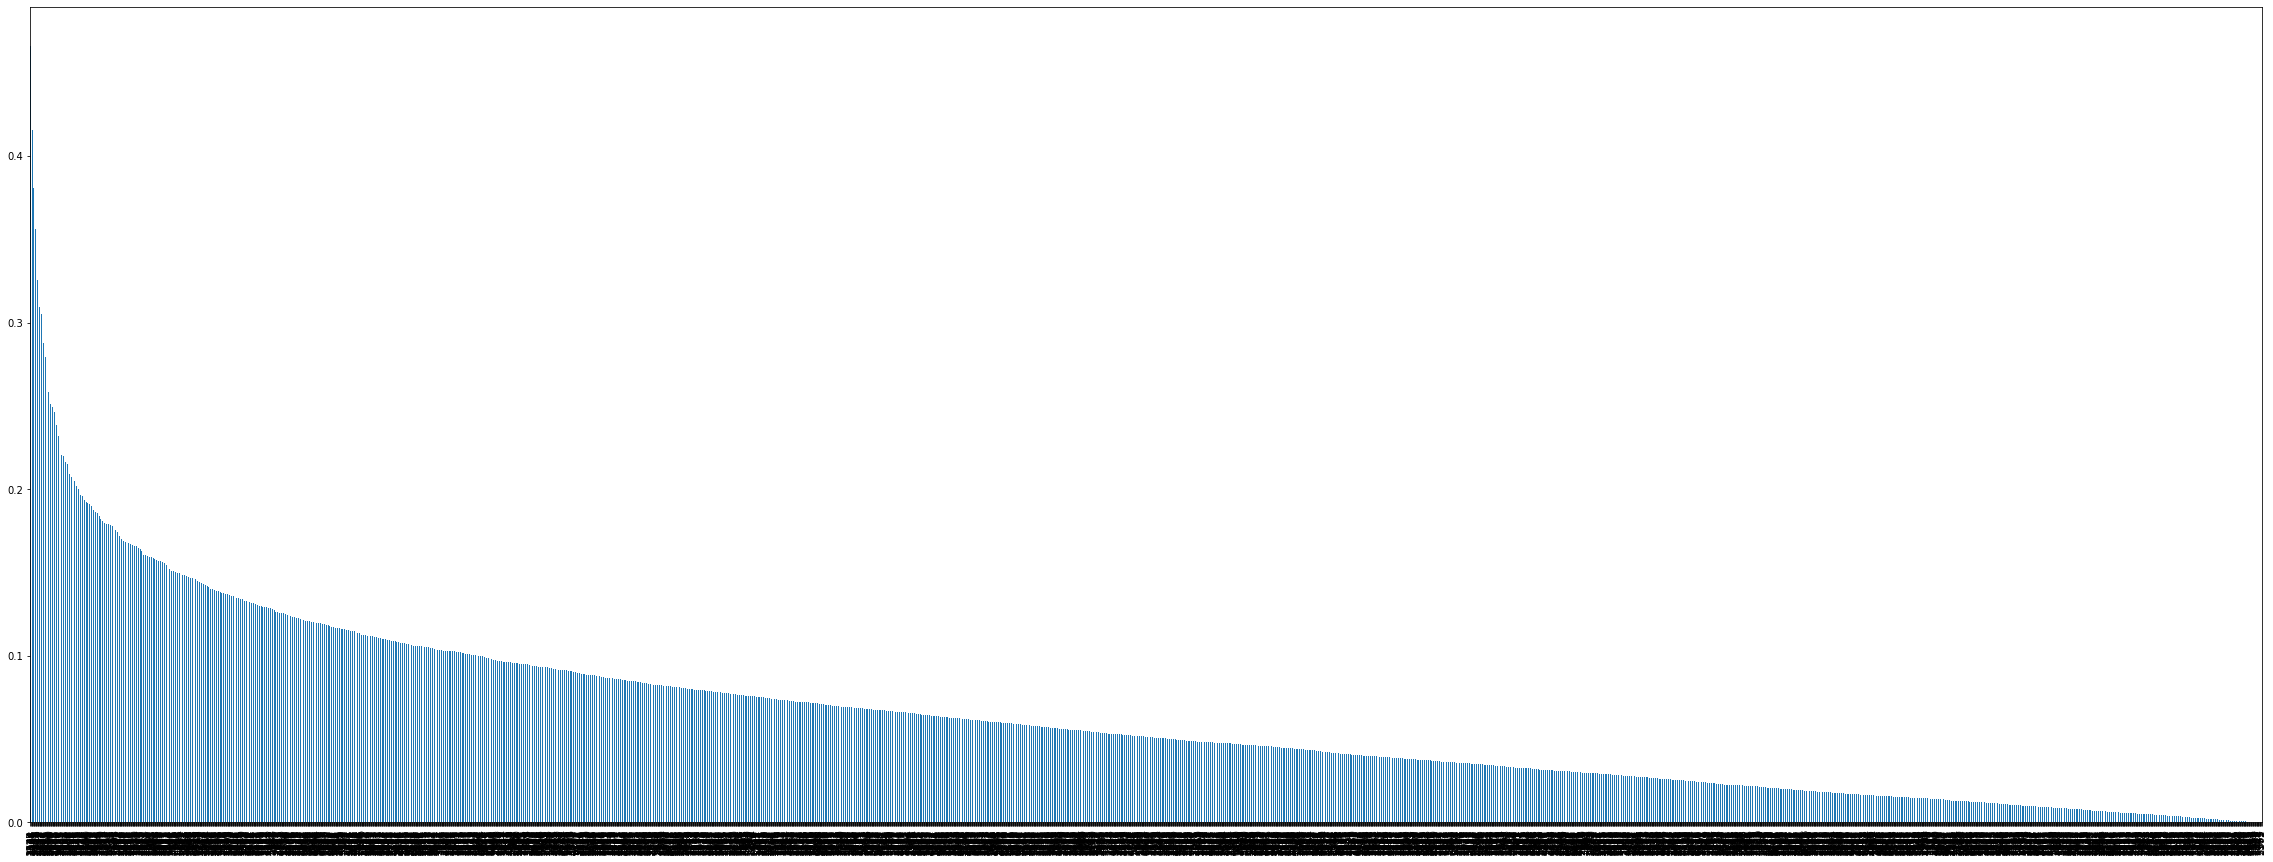

In [59]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=required_features_t
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [60]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_2]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_2):
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  HG2280-HT2376_at
Selected Feature 2 is :  L13738_at
Selected Feature 3 is :  U34877_at
Selected Feature 4 is :  X74328_rna1_at
Selected Feature 5 is :  D88799_at
Selected Feature 6 is :  D83597_at
Selected Feature 7 is :  M14091_at
Selected Feature 8 is :  M74524_at
Selected Feature 9 is :  D86479_at
Selected Feature 10 is :  L07541_at
Selected Feature 11 is :  U79256_at
Selected Feature 12 is :  M55621_at
Selected Feature 13 is :  L01042_at
Selected Feature 14 is :  HG2279-HT2375_at
Selected Feature 15 is :  D87078_at
Selected Feature 16 is :  AB000450_at
Selected Feature 17 is :  X74795_at
Selected Feature 18 is :  U90904_at
Selected Feature 19 is :  D44466_at
Selected Feature 20 is :  X76104_at
Selected Feature 21 is :  U52112_rna5_at
Selected Feature 22 is :  U16660_at
Selected Feature 23 is :  D80005_at
Selected Feature 24 is :  X56807_at
Selected Feature 25 is :  L38932_at
Selected Feature 26 is :  X70476_at
Selected Feature 27 is :  D83776_at
Selected Fe

Selected Feature 425 is :  D38449_at
Selected Feature 426 is :  J04809_rna1_at
Selected Feature 427 is :  M61199_at
Selected Feature 428 is :  X13293_at
Selected Feature 429 is :  X76061_at
Selected Feature 430 is :  L06132_at
Selected Feature 431 is :  X75535_at
Selected Feature 432 is :  D29963_at
Selected Feature 433 is :  U37359_at
Selected Feature 434 is :  U85611_at
Selected Feature 435 is :  M86667_at
Selected Feature 436 is :  U31342_at
Selected Feature 437 is :  U08471_at
Selected Feature 438 is :  U35735_at
Selected Feature 439 is :  M88279_at
Selected Feature 440 is :  X52056_at
Selected Feature 441 is :  D16227_at
Selected Feature 442 is :  U51127_at
Selected Feature 443 is :  D13637_at
Selected Feature 444 is :  U90551_at
Selected Feature 445 is :  U82313_at
Selected Feature 446 is :  M28215_at
Selected Feature 447 is :  U61849_at
Selected Feature 448 is :  X69111_at
Selected Feature 449 is :  U90437_at
Selected Feature 450 is :  M62397_at
Selected Feature 451 is :  L20010

Selected Feature 1340 is :  D87444_at
Selected Feature 1341 is :  U02020_at
Selected Feature 1342 is :  J05032_at
Selected Feature 1343 is :  X16316_at
Selected Feature 1344 is :  L33477_at
Selected Feature 1345 is :  M34309_at
Selected Feature 1346 is :  X15341_at
Selected Feature 1347 is :  U83843_at
Selected Feature 1348 is :  U46692_rna1_at
Selected Feature 1349 is :  L19314_at
Selected Feature 1350 is :  U94747_at
Selected Feature 1351 is :  D50911_at
Selected Feature 1352 is :  U29171_at
Selected Feature 1353 is :  D78334_at
Selected Feature 1354 is :  M55210_at
Selected Feature 1355 is :  S77393_at
Selected Feature 1356 is :  HG3255-HT3432_at
Selected Feature 1357 is :  J04823_rna1_at
Selected Feature 1358 is :  U20158_at
Selected Feature 1359 is :  L19527_at
Selected Feature 1360 is :  D86960_at
Selected Feature 1361 is :  U80457_at
Selected Feature 1362 is :  X68486_at
Selected Feature 1363 is :  M84739_at
Selected Feature 1364 is :  X66141_at
Selected Feature 1365 is :  D1364

Selected Feature 1699 is :  HG987-HT987_at
Selected Feature 1700 is :  D42063_at
Selected Feature 1701 is :  HG4582-HT4987_at
Selected Feature 1702 is :  U36787_at
Selected Feature 1703 is :  D79991_at
Selected Feature 1704 is :  D79983_at
Selected Feature 1705 is :  S68616_at
Selected Feature 1706 is :  M16038_at
Selected Feature 1707 is :  U97502_rna1_at
Selected Feature 1708 is :  HG3627-HT3836_at
Selected Feature 1709 is :  D78151_at
Selected Feature 1710 is :  U07563_cds1_at
Selected Feature 1711 is :  S77812_at
Selected Feature 1712 is :  U08998_at
Selected Feature 1713 is :  X02596_at
Selected Feature 1714 is :  U72515_at
Selected Feature 1715 is :  U44111_at


In [61]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 1715
['HG2280-HT2376_at', 'L13738_at', 'U34877_at', 'X74328_rna1_at', 'D88799_at', 'D83597_at', 'M14091_at', 'M74524_at', 'D86479_at', 'L07541_at', 'U79256_at', 'M55621_at', 'L01042_at', 'HG2279-HT2375_at', 'D87078_at', 'AB000450_at', 'X74795_at', 'U90904_at', 'D44466_at', 'X76104_at', 'U52112_rna5_at', 'U16660_at', 'D80005_at', 'X56807_at', 'L38932_at', 'X70476_at', 'D83776_at', 'AF000545_at', 'X52730_rna1_at', 'U79246_at', 'U34252_at', 'D30037_at', 'L20320_at', 'M19507_at', 'X64037_at', 'X62535_at', 'AC002486_at', 'S67156_at', 'M95610_at', 'U66661_at', 'D80012_at', 'D16217_at', 'HG3432-HT3618_at', 'U18543_at', 'X81636_at', 'D14658_at', 'D50914_at', 'M60091_at', 'D63390_at', 'X02751_at', 'J04101_at', 'U65011_at', 'D38491_at', 'X63692_at', 'D86959_at', 'M35252_at', 'M16279_at', 'X77166_at', 'U85658_at', 'M64595_at', 'HG3405-HT3586_at', 'X68194_at', 'D38535_at', 'U20240_at', 'M29971_at', 'M77836_at', 'U35113_at', 'S74017_at', 'U77718_at', 'D86971_at', 'M158

In [62]:
X_train2 = X_train[required_features_mi]
X_train2.head()

,HG2280-HT2376_at,L13738_at,U34877_at,X74328_rna1_at,D88799_at,D83597_at,M14091_at,M74524_at,D86479_at,L07541_at,...,M16038_at,U97502_rna1_at,HG3627-HT3836_at,D78151_at,U07563_cds1_at,S77812_at,U08998_at,X02596_at,U72515_at,U44111_at
55,-0.553791,-0.692273,-0.948440,-1.073764,-1.216175,-0.385480,-0.828787,-0.678914,-0.395488,-0.206352,...,-0.709015,0.718817,-0.659096,-0.084138,-0.207767,0.649154,0.634659,0.016596,0.508124,-0.936188
70,2.621539,5.046710,-0.125077,2.998646,2.189673,0.493851,2.716124,0.843646,0.447259,0.265778,...,0.917390,0.594056,2.661508,0.011980,-1.772101,1.167482,-0.827412,0.376525,1.149457,1.132018
62,-0.404335,-0.739883,1.979644,-0.341029,-1.927470,2.024331,0.415041,0.193603,-0.507046,1.785447,...,0.100382,-0.854551,-0.021972,1.863507,0.530599,-0.336837,1.005905,-0.274277,0.190346,-0.360687
43,2.861648,0.000055,0.044742,2.515141,-1.852156,1.484489,3.286213,-0.150537,5.769297,0.265778,...,-0.489539,-0.064402,-0.167755,2.946094,-1.138024,1.888464,-1.881569,2.314283,-4.764100,1.096050
4,-0.705697,-0.220141,-0.222851,-0.734812,0.315201,-0.023730,-0.123951,0.728932,-0.161459,1.018236,...,-0.114020,0.829715,-0.794080,0.985802,2.637236,-0.664202,1.157154,0.523008,0.563013,-0.306734


# Selection of features using F Classification 

In [63]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  # Set of all the names of correlated columns
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # getting the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train2, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :105.82142806053162 seconds


In [64]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 1473


In [65]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['X53777_at', 'U63336_at', 'U35735_at', 'D38550_at', 'U36787_at', 'X78627_at', 'X59065_at', 'D14659_at', 'U97502_rna1_at', 'D42087_at', 'M91083_at', 'D21163_at', 'X67247_rna1_at', 'L25085_at', 'U09825_at', 'X14813_at', 'D50928_at', 'D49387_at', 'L42542_at', 'S50223_at', 'L78267_at', 'U83461_at', 'D26598_at', 'U66618_at', 'M69039_at', 'U80017_rna1_at', 'D15050_at', 'U43923_at', 'L21934_at', 'M63904_at', 'U34038_at', 'U78107_at', 'HG3214-HT3391_at', 'X16282_at', 'U79282_at', 'L42450_at', 'X52005_at', 'X63527_at', 'D63879_at', 'M24194_at', 'D50925_at', 'X67325_at', 'U76189_at', 'U94586_at', 'U91931_at', 'U24186_at', 'D13900_at', 'U20908_at', 'X15949_at', 'U85611_at', 'HG3088-HT3263_at', 'U07563_cds1_at', 'X54942_at', 'S87759_at', 'U79270_at', 'X77737_at', 'L19437_at', 'M55150_at', 'U48231_at', 'X81889_at', 'D28124_at', 'U66033_at', 'L19871_at', 'L38616_at', 'U19345_at', 'D17400_at', 'U12595_at', 'HG1862-HT1897_at', 'M80254_at', 'M75099_at', 'U52522

In [66]:
required_features_fc = selected_features_fc[:number_of_features_required_3]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 977


In [67]:
X_train3 = X_train[required_features_fc]
X_train3.head()

,X53777_at,U63336_at,U35735_at,D38550_at,U36787_at,X78627_at,X59065_at,D14659_at,U97502_rna1_at,D42087_at,...,M29960_at,U08471_at,M63379_at,M55905_at,M97936_at,M68520_at,U26914_at,D31784_at,J05614_at,X69908_rna1_at
55,-1.140312,-0.055386,-0.087905,-1.132561,-1.314464,-0.199358,-0.188986,0.097402,0.718817,-1.149752,...,-0.561120,1.043486,-0.317329,-0.174253,-0.397400,-0.440904,0.704964,-0.206710,-0.011185,0.464113
70,-1.026989,2.116877,1.651104,2.935672,-0.509214,-0.230732,-0.729085,1.276218,0.594056,0.834257,...,5.410615,-1.084152,0.682935,-0.068742,-2.098020,2.222606,0.153079,1.536593,-1.257609,-1.228159
62,-0.436677,-0.036275,-1.260726,0.533444,0.800193,-0.344464,2.180479,1.356137,-0.854551,1.518614,...,-0.622056,1.472918,0.269529,1.868819,0.133800,1.221323,-0.358814,-1.429624,0.813503,2.989156
43,-0.495399,-1.686176,0.397400,-0.358318,-0.411183,-0.501336,1.483577,-1.121373,-0.064402,-1.030460,...,-0.815020,-0.823890,-0.104113,-0.490785,-0.368213,0.476527,3.128460,0.886107,0.210211,-0.431305
4,1.578076,1.078522,0.235631,0.167061,-0.180112,1.643886,-0.171564,2.315174,0.829715,0.714965,...,0.383389,-0.726292,-0.372862,2.348414,0.205794,0.880986,0.465014,-0.154671,0.530070,1.544126


In [68]:
X_test3 = X_test[required_features_fc]
X_test3.head()

,X53777_at,U63336_at,U35735_at,D38550_at,U36787_at,X78627_at,X59065_at,D14659_at,U97502_rna1_at,D42087_at,...,M29960_at,U08471_at,M63379_at,M55905_at,M97936_at,M68520_at,U26914_at,D31784_at,J05614_at,X69908_rna1_at
26,-0.122805,1.263260,1.731988,-0.154388,1.255335,-0.211123,4.985507,-0.881614,-0.695135,-0.427723,...,-0.713460,-2.671747,-0.224090,0.219015,-2.014351,-0.791106,0.944914,1.094262,-0.290635,-0.863143
27,0.992915,0.919266,-0.775421,0.730462,-0.880329,-0.250341,-0.833620,-0.501996,-0.757515,-0.126355,...,1.114622,-0.641707,0.778917,0.362893,-0.627003,-0.036445,1.120878,0.131543,-1.200694,-0.217474
48,-0.035581,-0.615970,-0.593431,-0.558792,0.758180,-1.015092,-0.258676,0.397101,0.046496,-0.584686,...,-0.500184,0.718159,-0.337897,0.468404,0.295300,-0.559282,-0.934694,-0.701079,-0.413569,-0.321883
22,-1.881379,1.123114,-0.633873,-0.524227,-0.740286,0.251649,-1.356296,-0.721775,-0.376303,-0.716535,...,-0.073631,-1.552623,-0.252885,-0.509969,0.764236,-0.652998,-0.614761,1.302418,0.629670,-0.872331
30,0.635775,0.288609,0.741157,-0.230430,2.095596,-0.622912,-0.554859,0.257242,-1.173384,0.589395,...,-0.134567,-0.147210,0.566386,-1.411606,4.301679,-0.051242,-1.310616,-0.024574,0.227855,-0.643465


In [69]:
X_test3.shape

(15, 977)

In [70]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1]
[1 2 1 1 2 1 1 2 2 2 1 2 2 1 2]


# KNN Classifier

In [71]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
     
    f_score_knn = f1_score(y_test3, y_test_prediction)
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 93.3333
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 91.2281
Testing accuracy on selected features for 2 neighbors: 73.3333
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 94.7368
Testing accuracy on selected features for 3 neighbors: 93.3333
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 89.4737
Testing accuracy on selected features for 4 neighbors: 86.6667
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 91.2281
Testing accuracy on selected features for 5 neighbors: 93.3333
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 87.7193
Testing accuracy on selected features for 6 neighbors: 80.0000
KNN Classfier for 7 neighbors:
Training accuracy on

In [72]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[7 0]
 [1 7]]
Average Confusion matrix is : [[7. 0.]
 [4. 4.]]


Confusion Matrix of KNN Classifier:


<AxesSubplot:>

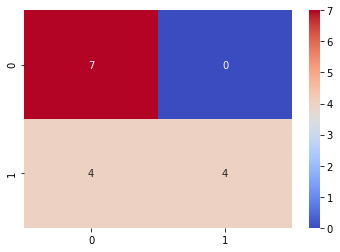

In [73]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [74]:
f_score_knn = f1_score(y_test3, max_y_test_prediction)

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9333333333333333
Average F-Score is : 0.7892624715461606


# SVM(Support Vector Machine)

In [75]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.2456
Testing accuracy on selected features: 80.0000


In [76]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[7 0]
 [3 5]]


Confusion Matrix of SVM Classifier:


<AxesSubplot:>

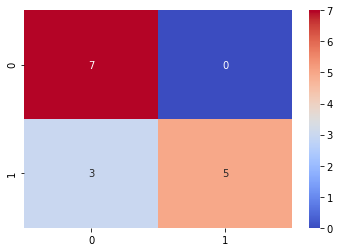

In [77]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [78]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc)

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8235294117647058
